# Esforço Computacional (Velocidade?)

Rode e comente em detalhes os exemplos 4.2 (página 135) e o exemplo 4.3 (página 137) do livro *Computational Physics* de *Mark Newman*.


*"One thing we need to get a feel for is how fast computers really are"* (página 134)

## Benchmark

Prática de executar uma série de testes de estresse computacional em um computador afim de avaliar, e até categorizar, o desempenho de um computador.

Dados extraídos no dia 22/06/2021.

![image](passmark_01.png)

![image](passmark_02.png)

#### Bibliotecas usadas

In [109]:
from math import exp
from time import time
from numpy import zeros
from numpy import array
import random
import matplotlib.pyplot as plt

## *Computational Physics* de *Mark Newman*, Exemplo 4.2
### Cálculo da Energia Média $\langle E \rangle$ do Oscilador Harmônico Quântico

$$\langle E \rangle = \frac{1}{Z} \sum_{n=0}^{\infty|} E_ n e^{-\beta E_n}$$

Considerando o oscilador a uma temperatura $T$ e $k_B$ a constante de Boltzmann, então $\beta = 1/(k_B T)$ e $Z = \sum_{n=0}^{\infty} e^{\beta E_n}$ .

O exemplo 4.2 do livro *Computational Physics* de *Mark Newman* nos dá como parâmetros inciciais $k^B T = 100$, então $\beta = 1/(k_B T) = 1/100$.

Para realizar a somatória discreta até $\infty$ de modo interativo nos levaria a realizar interações infinitas, logo, tempo infinito, então computacionalmente nós limitamos esse número de interações, e no exemplo nos dá 1 000 interações.

### Código Original

In [114]:
terms = 1000
beta = 1/100
S = 0.0
Z = 0.0
for n in range(terms):
    E = n + 0.5
    weight = exp(-beta*E)
    S += weight*E
    Z += weight

print(S/Z)

99.95543134093475


#### Comparativo de tempo por número de interações

In [120]:
terms = 10 ** 8
beta = 1/100
S = 0.0
Z = 0.0

tempo_inicio = time()

for n in range(terms):
    E = n + 0.5
    weight = exp(-beta*E)
    S += weight*E
    Z += weight

tempo_execucao = time() - tempo_inicio 

print("<E> =", S/Z)
print("Tempo de Execução:             ", tempo_execucao, "segundos")

if terms == 10 ** 3:
    print("Tempo de Execução do Newman:   ", 0.01, "segundos")
elif terms == 10 ** 6:
    print("Tempo de Execução do Newman:   ", 1.4, "segundos")
elif terms == 10 ** 9:
    print("Tempo de Execução do Newman:", 1320.0, "segundos")

<E> = 100.00083333194436
Tempo de Execução:              35.045483350753784 segundos


### Comparativo da Diferença

In [125]:
terms = 3595
beta = 1/100

for t in range(1, terms + 1):
    S = 0.0
    Z = 0.0

    tempo_inicio = time()

    for n in range(t):
        E = n + 0.5
        weight = exp(-beta*E)
        S += weight*E
        Z += weight

    tempo_execucao = time() - tempo_inicio

    if t+10 > terms:
        print("Interações =", t)
        print("<E> =", S/Z)
        print("Tempo de Execução:", tempo_execucao, "segundos")
        print("")

Interações = 3586
<E> = 100.00083333194428
Tempo de Execução: 0.0009937286376953125 segundos

Interações = 3587
<E> = 100.00083333194429
Tempo de Execução: 0.0010616779327392578 segundos

Interações = 3588
<E> = 100.0008333319443
Tempo de Execução: 0.0015704631805419922 segundos

Interações = 3589
<E> = 100.00083333194432
Tempo de Execução: 0.001313924789428711 segundos

Interações = 3590
<E> = 100.00083333194435
Tempo de Execução: 0.0010483264923095703 segundos

Interações = 3591
<E> = 100.00083333194436
Tempo de Execução: 0.0010764598846435547 segundos

Interações = 3592
<E> = 100.00083333194436
Tempo de Execução: 0.0011208057403564453 segundos

Interações = 3593
<E> = 100.00083333194436
Tempo de Execução: 0.0012812614440917969 segundos

Interações = 3594
<E> = 100.00083333194436
Tempo de Execução: 0.001321554183959961 segundos

Interações = 3595
<E> = 100.00083333194436
Tempo de Execução: 0.0011432170867919922 segundos



In [136]:
terms = 1000
step = 1

beta = 1/100

interacoes = []
tempos = []
energias = []
diferencas_das_energias = []

for t in range(1, terms + 1, step):
    S = 0.0
    Z = 0.0

    tempo_inicio = time()

    for n in range(t):
        E = n + 0.5
        weight = exp(-beta*E)
        S += weight*E
        Z += weight

    tempo_execucao = time() - tempo_inicio

    interacoes += [t]
    tempos += [tempo_execucao]
    energias += [S/Z]
    if t > 1:
        diferencas_das_energias += [abs(energias[-2] - energias[-1])]

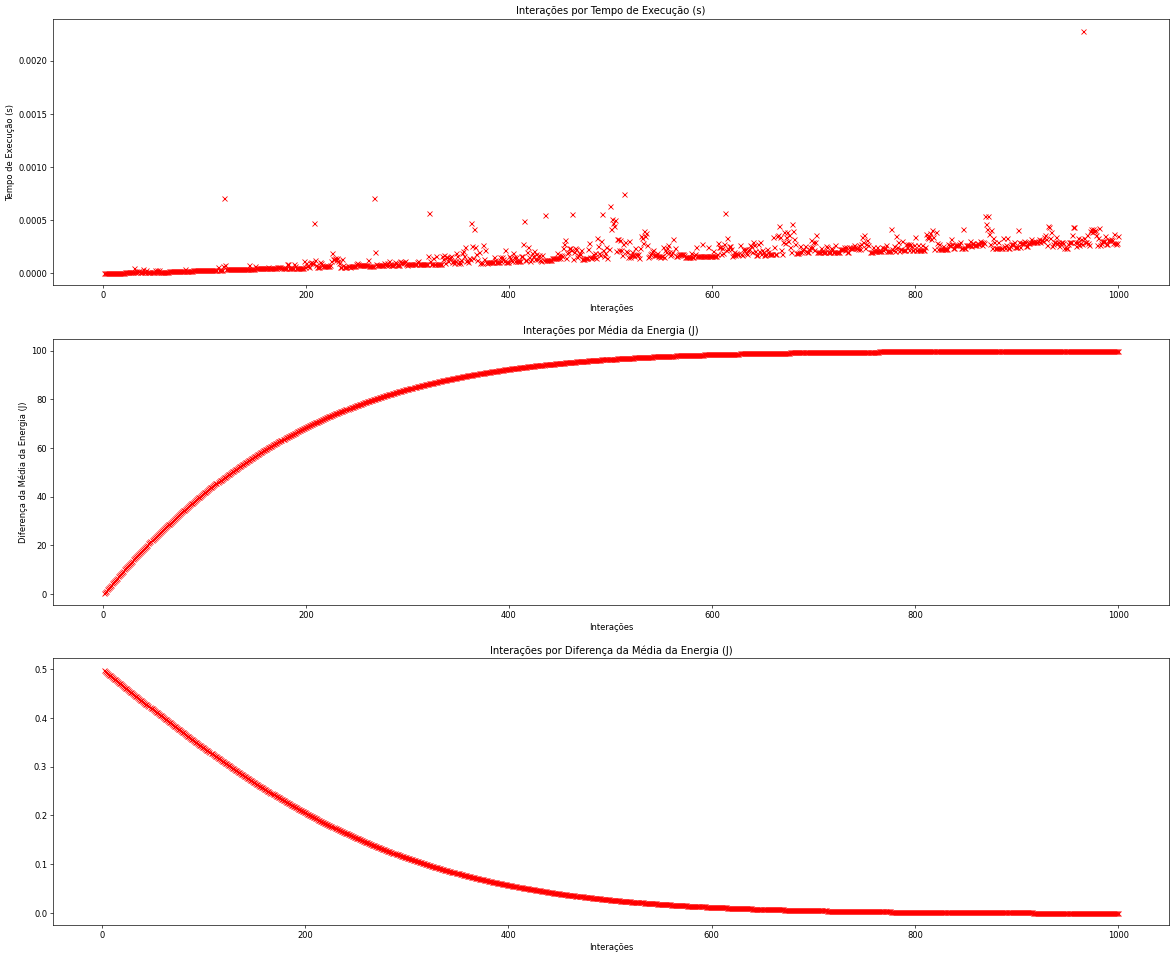

In [137]:
ignorar = 0

fig, axs = plt.subplots(3, 1, figsize=(24, 20), dpi = 60)
axs[0].set_title("Interações por Tempo de Execução (s)")
axs[0].set_xlabel('Interações')
axs[0].set_ylabel('Tempo de Execução (s)')
axs[0].plot(interacoes[ignorar + 0:], tempos[ignorar + 0:], 'rx')

axs[1].set_title("Interações por Média da Energia (J)")
axs[1].set_xlabel('Interações')
axs[1].set_ylabel('Média da Energia (J)')
axs[1].plot(interacoes[ignorar + 0:], energias[ignorar + 0:], 'rx')

axs[2].set_title("Interações por Diferença da Média da Energia (J)")
axs[2].set_xlabel('Interações')
axs[1].set_ylabel('Diferença da Média da Energia (J)')
axs[2].plot(interacoes[ignorar + 1:], diferencas_das_energias[ignorar + 0:], 'rx')

### Extra: Série de Taylor para $e^x$

Assim como no exemplo anterior, podemos calcular uma aproximação de $e^x$ para qualquer x usando interações *infinitas* (que serão limitadas pelo número de interações $N$ ou, neste caso, ao valor do fatorial ser grande demais para o Python calcular).

$$e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}$$

In [140]:
N = 10 ** 7
x = 1


fatorial = 1.0
e_x = 0.0
n = 0

tempo_inicio = time()
for _ in range(N):
    if fatorial < 0:
        # overflow do fatorial
        pass
    else:
        e_x = e_x + (x ** n) / fatorial

        n = n + 1
        fatorial = fatorial * n

tempo_execucao = time() - tempo_inicio

print("e_" + str(x) + "=", e_x)
print("Tempo de Execução:", tempo_execucao, "segundos")

e_1= 2.7182818284590455
Tempo de Execução: 5.429948091506958 segundos


Se compararmos o valor obtido com o informado pelo **WolframAlpha** vemos que temos precisão até a décima quinta casa decimal (a penúltima apresentada), mas sem utilizar métodos que ampliem a precisão do Python, esta função está limitada a esta precisão. 

![image](e_1.png)

## *Computational Physics* de *Mark Newman*, Exemplo 4.3
### Multiplicação de Matrizes

![image](matrizes_01.png)

#### Gerando as matrizes

Primeiramente criamos duas matrizes com valores aleatórios, pois o algoritmo do exemplo não necessida as matrizes já criadas.

In [142]:
N = 1000
A = array([[random.randint(0, 99) for _ in range(N)] for _ in range(N)])
B = array([[random.randint(0, 99) for _ in range(N)] for _ in range(N)])

array([[ 9, 84, 94, ..., 73, 18, 75],
       [84, 97, 28, ..., 83, 62, 18],
       [99, 83, 38, ..., 40, 43, 85],
       ...,
       [38, 19, 30, ..., 88, 36, 67],
       [ 1, 28, 78, ..., 95, 36, 22],
       [85, 93, 52, ...,  2, 73, 96]])

### Código Original

*Com a alteração no tamanho N para 100, para uma matrix 1000x1000 o código irá demorar um tempo consideravel para executar.*

In [144]:
N = 200
C = zeros([N,N] ,float)

for i in range(N):
    for j in range(N):
        for k in range(N):
            C[i,j] += A[i,k]*B[k,j]

#### Comparativo de tempo pelo tamanho da matrix

In [149]:
N = 400
C = zeros([N,N] ,float)

tempo_inicio = time()

for i in range(N):
    for j in range(N):
        for k in range(N):
            C[i,j] += A[i,k]*B[k,j]

tempo_execucao = time() - tempo_inicio

print("Tempo de Execução:", tempo_execucao, "segundos")

Tempo de Execução: 48.931843519210815 segundos


In [150]:
tamanho_matrix = []
tempos_matrix = []

for t in [10, 20, 50, 100, 200, 400]:
    C = zeros([t,t] ,float)
    
    tempo_inicio = time()

    for i in range(t):
        for j in range(t):
            for k in range(t):
                C[i,j] += A[i,k]*B[k,j]

    tempo_execucao = time() - tempo_inicio

    tamanho_matrix += [t]
    tempos_matrix += [tempo_execucao]

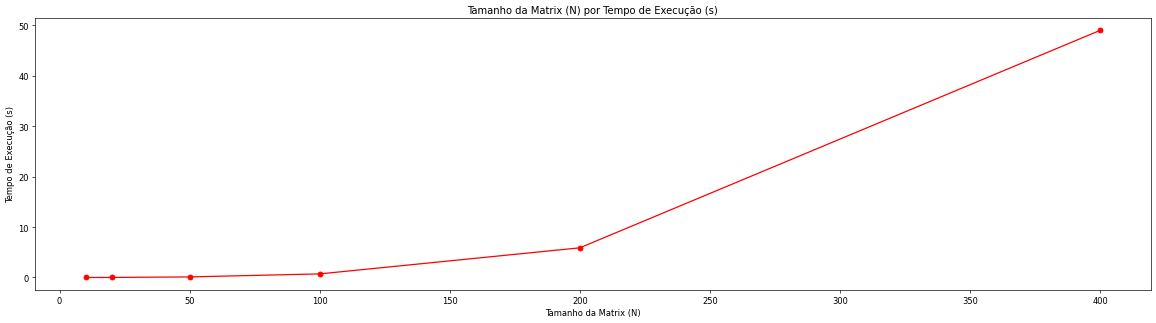

In [152]:
fig, axs = plt.subplots(1, 1, figsize=(24, 6), dpi = 60)
axs.set_title("Tamanho da Matrix (N) por Tempo de Execução (s)")
axs.set_xlabel('Tamanho da Matrix (N)')
axs.set_ylabel('Tempo de Execução (s)')
axs.plot(tamanho_matrix, tempos_matrix, 'ro-')

## Velocidade = Análise de Complexidade Computacional

De acordo com o livro, podemos analisar o código acima considerando que existem 3 laços aninhados *(nested loops)* que executam internamente 2 operações, uma multiplicação e uma adição.

`
                C[i,j] += A[i,k]*B[k,j]
`

Estas duas operações são executadas $N$ vezes pelo laço mais interno.

O laço central executa o laço mais interno $N$ vezes, então podemos concluir que ele faz com que as duas operações internas sejam executadas $N \cdot N$ vezes.

Por fim, o laço mais externo executa o laço central $N$ vezes, que por sua vez executa o laço mais interno $N$ vezes, que faz com que as duas operações internas, que serão executadas $N$ vezes, sejam executadas $N \cdot N \cdot N$ vezes!

Isso resulta em $2N^3$ operações executadas para qualquer matrix de tamanho $NxN$.

#### Complexidade Assintótica

Pela **Teoria da Complexidade Computacional** a análise da quantidade de operações (ou conjunto de operações) que serão realizadas por um algoritmo dependendo do número de entradas (N), é chamada **Complexidade Assintótica** do algoritmo e é representada pela notação **Big-O**, então a complexidade do algoritmo acima que realiza a multiplicação de duas matrizes, conforme visto, é $O(2N^3)$, ou até mesmo $O(N^3)$ pois $2$ pode não ser muito relevante se comparado ao cúbico de um número relativamente grande, denotando então um crescimento polinimial cúbico.

Do mesmo modo, o algoritmo anterior do cálculo da Energia Média do Oscilador Harmônico Quântico temos 6 operações sendo executadas internamente.

`        E = n + 0.5`

`        weight = exp(-beta*E)`

`        S += weight*E`

`        Z += weight`

Como estas seis operações são executadas N vezes pelo por um laço, sendo N o número de interações desejada, podemos dizer que sua **Complexidade Assintótica** é  $O(6N)$ ou mesmo $O(N)$, denotando um crescimento linear, o que condiz com o gráfico de Interações por Tempo de Execução.

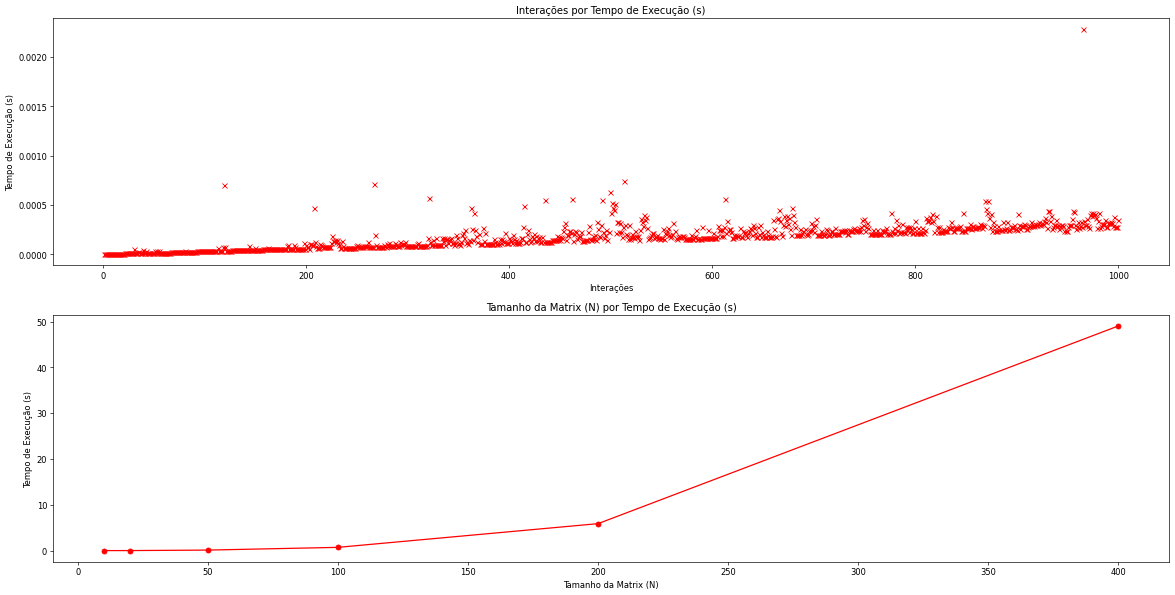

In [153]:
fig, axs = plt.subplots(2, 1, figsize=(24, 12), dpi = 60)
axs[0].set_title("Interações por Tempo de Execução (s)")
axs[0].set_xlabel('Interações')
axs[0].set_ylabel('Tempo de Execução (s)')
axs[0].plot(interacoes[ignorar + 0:], tempos[ignorar + 0:], 'rx')

axs[1].set_title("Tamanho da Matrix (N) por Tempo de Execução (s)")
axs[1].set_xlabel('Tamanho da Matrix (N)')
axs[1].set_ylabel('Tempo de Execução (s)')
axs[1].plot(tamanho_matrix, tempos_matrix, 'ro-')